In [1]:
import scipy.stats as st
import numpy as np

In [2]:
z_score = st.norm.ppf((1 + 0.95)/2)

In [3]:
z_score

1.959963984540054

In [4]:
def calculateConfWald(k1, k2, n1, n2):
    p1 = k1/n1
    p2 = k2/n2
    
    P = (k1 + k2)/(n1 + n2)
    
    return p1 - p2 + z_score*np.sqrt(P*(1-P)*(1/n1 + 1/n2))

In [5]:
calculateConfWald(189, 104,11034, 11037)

0.01072589142897849

In [6]:
import statsmodels

In [7]:
statsmodels.__version__

'0.12.1'

In [8]:
pip install statsmodels==0.12.1

Note: you may need to restart the kernel to use updated packages.


In [9]:
#alternative method
from statsmodels.stats.proportion import confint_proportions_2indep, test_proportions_2indep
print("Wald's interval:", confint_proportions_2indep(189, 11034, 104, 11037, method = 'wald', compare='diff'))

Wald's interval: (0.004687750675049438, 0.010724297276960126)


In [10]:
stats, p_value = test_proportions_2indep(189, 11034, 104, 11037, alternative = 'two-sided',
                                          method = 'score',  return_results=False)

In [11]:
p_value

5.69524362691927e-07

In [12]:
189/(11034-189)

0.017427385892116183

In [13]:
104/(11037-104)

0.009512485136741973

In [14]:
(189/10845)/(104/10933)

1.8320539419087138

In [15]:
import numpy as np

In [16]:
def get_bootstrap_samples(x, n_resamples):
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples

In [17]:
def percentile_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [18]:
np.random.seed(0)

In [19]:
control_group = np.hstack((np.ones(189), np.zeros(10845)))
aspirin_group = np.hstack((np.ones(104), np.zeros(10933)))

In [20]:
np.random.shuffle(control_group)
np.random.shuffle(aspirin_group)

In [21]:
control_group

array([0., 1., 0., ..., 0., 0., 0.])

In [22]:
def get_heart_attack(sample):
    count = 0
    for i in range(len(sample)):
        if sample[i] == 1:
            count += 1
    return count

In [23]:
aspirin = get_bootstrap_samples(aspirin_group, 1000)
control = get_bootstrap_samples(control_group, 1000)

In [24]:
aspirin.shape

(1000, 11037)

In [25]:
scores = []

for i in range(len(aspirin)):
    count_heart_aspirin = get_heart_attack(aspirin[i])
    count_heart_control = get_heart_attack(control[i])
    
    print(count_heart_aspirin)
    print(count_heart_control)
    
    odds_aspirin = count_heart_aspirin/(len(aspirin[i]) - count_heart_aspirin)
    odds_control = count_heart_control/(len(control[i]) - count_heart_control)
    
    scores.append(odds_control/odds_aspirin)
    

116
172
121
198
105
194
108
182
102
178
111
214
107
198
107
184
118
195
113
184
91
199
79
195
101
190
90
177
115
214
107
186
99
205
101
166
109
183
117
202
94
204
103
201
115
180
95
186
110
208
99
190
112
175
103
190
102
171
109
206
116
195
112
205
96
187
95
177
109
191
108
183
95
183
110
163
111
187
96
204
103
170
88
183
94
197
111
190
112
171
111
171
107
184
92
211
99
179
120
196
97
193
99
200
102
190
90
187
117
204
116
182
99
185
112
214
88
220
92
189
99
206
111
198
101
201
125
165
95
182
100
193
97
184
126
182
94
173
127
175
96
184
115
171
116
196
98
205
98
191
110
191
106
168
129
192
107
187
112
187
98
198
108
181
104
190
98
199
103
198
103
150
107
179
102
190
109
183
106
180
100
188
128
202
111
163
101
193
105
184
100
179
110
188
115
176
99
194
90
201
102
165
98
174
96
201
114
184
119
167
95
193
119
185
117
215
115
165
94
193
111
194
119
214
115
183
114
168
105
196
117
158
98
193
105
173
102
196
95
191
102
175
83
198
99
216
105
187
107
201
88
206
93
187
117
182
114
201
86
183
100

In [26]:
scores

[1.4908126400802546,
 1.648444578677137,
 1.8632999472851872,
 1.6971423598312652,
 1.7577972603927348,
 1.946815207073987,
 1.8665197006861862,
 1.7323054395107453,
 1.6647393827374781,
 1.639424167040496,
 2.2092161645461137,
 2.4954541791771625,
 1.8971480327671275,
 1.982969512756747,
 1.878411958530901,
 1.7514576958067982,
 2.091549906675957,
 1.6538479758907063,
 1.6908127522174845,
 1.7405219103889709,
 2.1928567218718684,
 1.9696504477957053,
 1.5750234335568536,
 1.9748602701443874,
 1.908550123440203,
 1.935828219487386,
 1.5719967308223595,
 1.859969989220472,
 1.687582240849944,
 1.9073621565563963,
 1.693751968466362,
 1.8465834135852146,
 1.9647972941827234,
 1.8777446517648086,
 1.766030085786543,
 1.7066245814517862,
 1.9424704975044742,
 1.489451501492712,
 1.6969544449953777,
 2.1467797783933515,
 1.6611200080072066,
 2.098326714756076,
 2.116243798334704,
 1.7246553082038143,
 1.535499763285596,
 1.5494749098725902,
 1.7323054395107453,
 2.319331014064251,
 1.821905

In [27]:
percentile_interval(scores, 0.05)

array([1.45671747, 2.41163784])

In [32]:
z_value = (9.57-9.5)/(0.4/np.sqrt(160))

In [33]:
z_value

2.213594362117875

In [36]:
st.norm.sf(np.abs(z_value))*2

0.026856695507523776

In [38]:
p_value = 2*(1-st.norm.cdf(abs(z_value)))

In [39]:
p_value

0.026856695507523787

In [40]:
import pandas as pd

In [42]:
df = pd.read_csv('diamond_prices.csv', sep=',')

In [43]:
df.head(5)

,price,predicted_price_lm,predicted_price_gbdt
0,564,747.149466,799.049243
1,5914,6644.569397,6635.491541
2,2562,2096.573114,2138.584133
3,537,727.031366,694.107710
4,5964,7180.988674,7425.353560


In [48]:
mae_1 = abs(df['price'] - df['predicted_price_gbdt']).mean()

In [47]:
mae_2 = abs(df['price'] - df['predicted_price_lm']).mean()

In [49]:
mae_2 - mae_1

6.875650288841371

In [52]:
diff1 = abs(df['price'] - df['predicted_price_lm'])
diff2 = abs(df['price'] - df['predicted_price_gbdt'])

In [53]:
st.ttest_rel(diff1, diff2)

Ttest_relResult(statistic=2.38278347761891, pvalue=0.0171960673931188)

In [54]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [57]:
DescrStatsW(diff1 - diff2).tconfint_mean()

(1.2195607537344726, 12.531739823935677)

In [59]:
df1 = pd.read_csv('pines.txt', sep = '\t')

In [61]:
df1.head(5)

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [63]:
df1.shape

(584, 2)

In [83]:
ans = st.binned_statistic_2d(df1['sn'], df1['we'], None,'count', bins = [5, 5])

In [85]:
ans.statistic.mean()

23.36

In [87]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [181]:
bins = [5,5]
observed_counts = ans.statistic

In [93]:
bins

[5, 5]

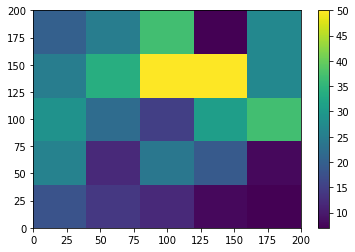

In [174]:
import matplotlib.pyplot as plt
bins = np.arange(0,41,10)
h = plt.hist2d(df1['sn'], df1['we'], bins=(5, 5))
plt.colorbar(h[3])

In [180]:
h[0].mean()

23.36

In [182]:
expected_counts = np.full((5,5), 23.36)

In [183]:
expected_counts

array([[23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36]])

In [184]:
statistic, p_value = st.chisquare(f_obs = observed_counts.ravel(), f_exp = expected_counts.ravel(),
                ddof = 2) # because we estimated two parameters of the distribution from the sample

In [185]:
statistic

150.58904109589042

In [186]:
p_value

3.704921753394499e-21